In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#we have data of:
# -Deaths
# -Confirmed
# -Oficial Infected
# 
# Real Infected = Official Infected * 1/prob(prob_going_hospital)
# 
# Confirmed = Official Infected + Recovered + Death
# Oficial Recovered = Confirmed - Infected - Deaths
# Subsceptible = N - Real Infected - Recovery - Death

In [3]:
#probability to go to the hospital and make the test in the initial dates in Spain
prob_going_hospital = 0.05 #segun Timothy Russell

In [4]:
df_recovered = pd.read_csv('database/time_series_covid19_recovered_global.csv')
df_death = pd.read_csv('database/time_series_covid19_deaths_global.csv')
df_confirmed = pd.read_csv('database/time_series_covid19_confirmed_global.csv')

In [5]:
def get_tr(dS,I,S):
    """
    from SIR model, ds/dt = - tr * I * S
    tr = -(dS/dt) / (I*S)
    """
    return -ds/(I*S)

# Calculating TR before quarantine in Spain, trmax

C:\Users\arosasga\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


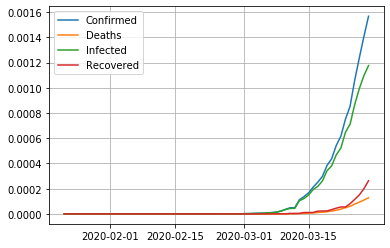

In [6]:
#Data from 2 MAR a 19 MAR, donde se puede apreciar los efectos precuarentena
start = pd.Timestamp('2020-01-22')
end = pd.Timestamp('2020-03-28')
t = np.linspace(start.value, end.value, 67)
t = pd.to_datetime(t).date
t = np.asarray(t)

country = 'Spain'
N = 46700000 #population

confirmed = df_confirmed[df_confirmed['Country/Region'] == country][df_confirmed.columns[4:]].values
recovered = df_recovered[df_recovered['Country/Region'] == country][df_recovered.columns[4:]].values
deaths = df_death[df_death['Country/Region'] == country][df_death.columns[4:]].values
oficial_infected = confirmed - deaths - recovered
real_infected = oficial_infected * 20
subsceptible = N - confirmed * 20

oficial_infected_unit = oficial_infected / N
subsceptible_unit = subsceptible / N
confirmed_unit = confirmed / N
recovered_unit = recovered / N
deaths_unit = deaths / N
real_infected_unit = real_infected / N

plt.plot(t,confirmed_unit.reshape(-1),label='Confirmed')
plt.plot(t,deaths_unit.reshape(-1),label='Deaths')
plt.plot(t,oficial_infected_unit.reshape(-1),label='Infected')
plt.plot(t,recovered_unit.reshape(-1),label='Recovered')

plt.legend()
plt.grid()
plt.show()

In [7]:
subsceptible_unit = subsceptible_unit.reshape(-1)
real_infected_unit = real_infected_unit.reshape(-1)

tr_vector = []
for i in range(len(subsceptible_unit)-1):
    ds = subsceptible_unit[i+1]-subsceptible_unit[i]
    tr = get_tr(ds, real_infected_unit[i], subsceptible_unit[i])
    tr_vector.append(tr)
    
tr_vector = tr_vector[40:58] 
tr_vector.remove(-0.0)
tr_vector.remove(1.4506544445008247)
    
mean = np.nanmean(tr_vector)
std = np.nanstd(tr_vector)

print('Spain')
print('tr = {} +- {} '.format(mean,std))

Spain
tr = 0.33713184015232145 +- 0.14601139017035183 


C:\Users\arosasga\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\arosasga\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


In [8]:
df_death.columns.values[4:][40:58]

array(['3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20'],
      dtype=object)

# Calculating TR in quarantine Italy, trmin

No tenemos datos de la cuarentena en Espana aun, asi que usamos la de Italia considerando que son primo hermanos.
Italia lleva varias semanas haciendo cuarentena severa, asi que cojemos los ultimos 6 dias para estimar el valor de tr.

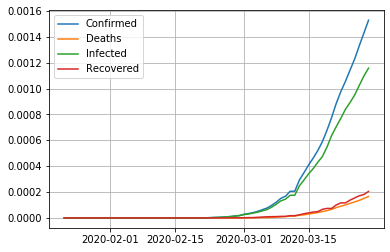

In [9]:
#Data from 25 FEB a 25 MAR, donde se puede apreciar los efectos precuarentena
start = pd.Timestamp('2020-01-22')
end = pd.Timestamp('2020-03-28')
t = np.linspace(start.value, end.value, 67)
t = pd.to_datetime(t).date
t = np.asarray(t)

country = 'Italy'
N = 60480000 #population

confirmed = df_confirmed[df_confirmed['Country/Region'] == country][df_confirmed.columns[4:]].values
recovered = df_recovered[df_recovered['Country/Region'] == country][df_recovered.columns[4:]].values
deaths = df_death[df_death['Country/Region'] == country][df_death.columns[4:]].values
oficial_infected = confirmed - deaths - recovered
real_infected = oficial_infected * 15
subsceptible = N - confirmed * 15

oficial_infected_unit = oficial_infected / N
subsceptible_unit = subsceptible / N
confirmed_unit = confirmed / N
recovered_unit = recovered / N
deaths_unit = deaths / N

plt.plot(t,confirmed_unit.reshape(-1),label='Confirmed')
plt.plot(t,deaths_unit.reshape(-1),label='Deaths')
plt.plot(t,oficial_infected_unit.reshape(-1),label='Infected')
plt.plot(t,recovered_unit.reshape(-1),label='Recovered')

plt.legend()
plt.grid()
plt.show()

In [10]:
subsceptible_unit = subsceptible_unit.reshape(-1)
real_infected_unit = real_infected_unit.reshape(-1)

tr_vector = []
for i in range(len(subsceptible_unit)-1):
    ds = subsceptible_unit[i+1]-subsceptible_unit[i]
    tr = get_tr(ds, real_infected_unit[i], subsceptible_unit[i])
    tr_vector.append(tr)

    
mean = np.nanmean(tr_vector[-5:])
std = np.nanstd(tr_vector[-5:])

print('Italy')
print('tr = {} +- {} '.format(mean,std))

Italy
tr = 0.08579409337477494 +- 0.012009605816036112 


C:\Users\arosasga\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\arosasga\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


Spain before quarantine
rr = 0.33713184015232145 +- 0.14601139017035183 

Italy severe quarantine
tr = 0.08579409337477494 +- 0.012009605816036112 